                                              sha256  \
0  e42b75fa32c93b75d370d61c947098cabd8bf1dd55a5ee...   
1  2fc6d5fc12addf0259afe57b22e510318a84274a1e8680...   
2  10792606fc063281ff2ae288cdbdb77675fd10777278ec...   
3  0bfb3803ee117aed607150084201cf5626257a2fc8bae6...   
4  004575d622dfdb7e2904d5b182089ab3c9fa7ce193746d...   

                                md5  label  numstrings  printables   entropy  \
0  e2dbe348a6370f586fab7e9568ccdabe      0         331        7043  5.334609   
1  ee0f8c6df3cc07c6c3d35ec5b32ffe8b      1         433        3215  6.469070   
2  614dce4e17952b1f886848021bd56645      0         308        6165  5.618080   
3  5fef689041958f6b08550e5a8a569048      1         806        6130  5.740129   
4  b6dc84da891d6b2360d996244626a436      1        5818     1399909  5.011869   

   paths  urls  registry  MZ  ...    subsystem  major_image_version  \
0      2    20         0   2  ...  WINDOWS_CUI                    0   
1      0     0         0   4  ...  WINDO

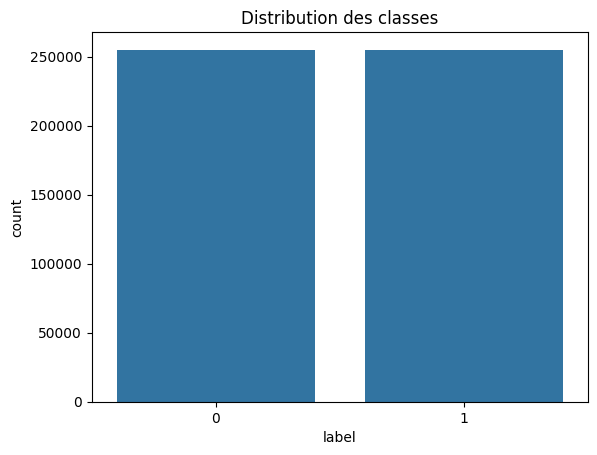

In [1]:
# Import des bibliothèques nécessaires
import pandas as pd

# Chargement des données d'entraînement
train_data = pd.read_csv('../res/train_dataset.csv')

# Affichage des premières lignes du jeu de données
print(train_data.head())

# Description statistique des données
print(train_data.describe())

# Visualisation de la distribution des classes
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=train_data)
plt.title('Distribution des classes')
plt.show()


In [2]:
# Gestion des valeurs manquantes
train_data.isnull().sum()

# Suppression des colonnes inutiles ou redondantes
columns_to_drop = ['sha256', 'md5']
train_data = train_data.drop(columns=columns_to_drop, axis=1)

# Traitement des variables catégorielles
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['entry'] = le.fit_transform(train_data['entry'])
train_data['imports'] = le.fit_transform(train_data['imports'])
train_data['exports'] = le.fit_transform(train_data['exports'])

# Gestion des valeurs manquantes
train_data = train_data.fillna(0)

# Séparation des features et de la target
X = train_data.drop('label', axis=1)
y = train_data['label']


In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Chargement des données d'entraînement
train_data = pd.read_csv('../res/train_dataset.csv')

# Suppression des colonnes inutiles ou redondantes
columns_to_drop = ['sha256', 'md5']
train_data = train_data.drop(columns=columns_to_drop, axis=1)

# Traitement des variables catégorielles
le = LabelEncoder()
train_data['entry'] = le.fit_transform(train_data['entry'])
train_data['imports'] = le.fit_transform(train_data['imports'])
train_data['exports'] = le.fit_transform(train_data['exports'])

# Traitement des variables catégorielles avec encodage one-hot
train_data = pd.get_dummies(train_data, columns=['subsystem'], drop_first=True)

# Gestion des valeurs manquantes
train_data = train_data.fillna(0)

# Séparation des features et de la target
X = train_data.drop('label', axis=1)
y = train_data['label']

# Split des données
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle avec une recherche d'hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)    
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_
print(f"Meilleurs hyperparamètres : {best_params}")

# Prédiction sur les données de validation
y_pred = grid_search.predict(X_val)

# Évaluation du modèle
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy du modèle : {accuracy}')


In [ ]:
# Import des données de test
test_data = pd.read_csv('../res/test_dataset.csv')

# Suppression des colonnes inutiles ou redondantes
test_data = test_data.drop(columns=columns_to_drop, axis=1)

# Traitement des variables catégorielles
test_data['entry'] = le.fit_transform(test_data['entry'])
test_data['imports'] = le.fit_transform(test_data['imports'])
test_data['exports'] = le.fit_transform(test_data['exports'])

# Gestion des valeurs manquantes
test_data = test_data.fillna(0)

# Prétraitement des variables catégorielles avec le même preprocessor
X_test = test_data  # Utilisez toutes les colonnes sauf 'id' pour la prédiction
y_test_pred = pipeline.predict(X_test)

# Génération d'identifiants uniques pour le fichier de soumission
start_id = 510000
submission_df = pd.DataFrame({'ID': range(start_id, start_id + len(test_data)), 'label': y_test_pred})
submission_df.to_csv('submission.csv', index=False)
